<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/period-and-revolution-time-rigid-pendulum-Ms091704/blob/main/rigid_pendulum_period_initial_angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracting the period of the rigid pendulum

**[description of the notebook]**

### Pseudocode
1. **Import needed modules:** `numpy` for special functions and linear algebra; `matplotlib.pyplot` for plotting; `scipy.integrate` for `solve_ivp` for finding the pendulum trajectory, and `quad` for integration.
2. **Define ODE function and the integrand:** [add details]
3. **Create utilities:** some basic plotting functions...
4. **Extract the period using the integral:** ...
5. **Extract the period using the differential equation:**...
6. **Plot both results and compare:**...

In [45]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

### Define ODE function and the integrand

1. `rigid_pendulum_ode(t, y, omega_0=1)` gives the differential equation for the rigid pendulum in the form needed for `solve_ivp`.
2. `period_integrand(theta, theta_0, omega_0=1)` gives the integrand in a form that can used with `quad`.

In [46]:
# define the rigid pendulum ODE and the integrand for integration with quad

# rigid pendulum ode
def rigid_pendulum_ode(t, y, omega_0=1):
  """
  """
  theta, ang_vel = y # unpacking our state variable
  dtheta_dt = ang_vel # first derivative
  d2theta_dt2 = - omega_0**2 * np.sin(theta) # second derivative
  dy_dt = [dtheta_dt, d2theta_dt2] # derivative of state variable
  return dy_dt

# define the integrand for the period
def period_integrand(theta, theta_0, omega_0=1):
  """
  """
  coeff = 4/(np.sqrt(2)*omega_0) # leading coefficient of the integrand
  denominator = np.sqrt( np.cos(theta) - np.cos(theta_0) ) # denominator of integrand
  return coeff/denominator

def Revolution_integrand(theta, theta_0, ang_vel_0, omega_0=1):
  """
  """
  coeff = 1/(np.sqrt(2)*omega_0) # leading coefficient of the integrand
  denominator = np.sqrt( np.cos(theta) - 1 + (ang_vel_0**2)/(2*(omega_0**2))) # denominator of integrand
  return coeff/denominator

### Create utilities

1. `basic_plot(x, y, xlabel=None, ylabel=None, figsize=(3,3))` creates a simple plot for fast evaluation of data, visually.
2. `ang_vel_zero_event(t, y, omega_0=1)` creates an event for `solve_ivp` (`ang_vel=0`).
3. `extract_period_int(n_points, eps=1e-3, omega_0=1)` extracts the period on a mesh of `theta_0` using the integral method.
4. `extract_period_ode(n_points, eps=1e-3, omega_0=1)` extracts the perido with `solve_ivp` events.

In [58]:
# create utilities

# basic plotting
def basic_plot(x, y, xlabel=None, ylabel=None, figsize=(3,3)):
  """
  """
  plt.figure(figsize=figsize)
  plt.plot(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

# define the event function: ang_vel = 0
def ang_vel_zero_event(t, y, omega_0=1):
  """
  """
  theta, ang_vel = y # unpack state variable
  return ang_vel # set to find values where ang_vel = 0

# add required attributes to the event function
ang_vel_zero_event.terminal = False # keep integrating after event(s) are found
ang_vel_zero_event.direction = -1 # track zeros when going from positive to negative

def T_Revolution_event(t, y, theta_0):
    theta, ang_vel = y
    return theta - (theta_0 + 2 * np.pi)  # triggers when θ increases by 2π

T_Revolution_event.terminal = True
T_Revolution_event.direction = 1  # only detect forward crossing


# extract period on mesh of theta_0 values
def extract_period_int(n_points, eps=1e-3, omega_0=1):
  """
  You should fill this out with the details...
  """

  # extract period with integral on a list of initial angles
  theta_0_list = np.linspace(eps, np.pi - eps, n_points) # list of initial angles

  period_list_int = [] # initialize list of periods

  for theta_0 in theta_0_list:
    period, err = quad(period_integrand, 0, theta_0, args=(theta_0, omega_0))
    period_list_int.append(period)

  period_list_int = np.array(period_list_int) # convert to a numpy array

  period_list_int = np.concatenate([period_list_int[::-1], period_list_int]) # enforcing symmetry to extend data
  theta_0_list = np.concatenate([-theta_0_list[::-1], theta_0_list]) # enforcing symmetry to extend data
  return theta_0_list, period_list_int


# extract period with solve_ivp evetns
def extract_period_ode(n_points, eps=1e-3, omega_0=1):
  """
  Extract period with solve_ivp events on a list of initial angles
  You should fill this out with the details...
  """
  theta_0_list = np.linspace(eps, np.pi - eps, n_points) # list of initial angles

  # range of times for integrating
  t_min = 0
  t_max = 100
  t_span = [t_min, t_max] # time span for solve_ivp

  period_list_ode = [] # initialize list of periods
  for theta_0 in theta_0_list:
    # define state variable for run
    y_0 = [theta_0, 0] # initial condition

    # solve differential equation
    sol = solve_ivp(rigid_pendulum_ode, t_span, y_0, args=(omega_0,),
                    max_step = 0.01,
                    dense_output=False,
                    events=ang_vel_zero_event
                    )
    # output the extracted period
    period = np.mean(np.diff(sol.t_events)) # define period
    period_list_ode.append(period) # append period

  period_list_ode = np.array(period_list_ode) # convert to a numpy array

  period_list_ode = np.concatenate([period_list_ode[::-1], period_list_ode]) # enforcing symmetry to extend data
  theta_0_list = np.concatenate([-theta_0_list[::-1], theta_0_list]) # enforcing symmetry to extend data
  return theta_0_list, period_list_ode

def Extract_Rev(n_points, theta_0=0, omega_0=1):
  ang_vel_list = np.linspace(2*omega_0,10, n_points)
  rev_ode=[]
  t_span = [0,100]
  for ang_vel_0 in ang_vel_list:
    y0=[theta_0, ang_vel_0]
    sol = solve_ivp(rigid_pendulum_ode, t_span, y0, args=(omega_0,), max_step = 0.01, events=T_Revolution_event)

    if len(sol.t_events[0])>0:
      rev_ode.append(sol.t_events[0][0])
    else:
      rev_ode.append(np.nan)
  return ang_vel_list, rev_ode

def Extract_Rev_int(n_points, theta_0=0, omega_0=1):
  ang_vel_list = np.linspace(2*omega_0,10, n_points)
  rev_integral=[]
  for ang_vel_0 in ang_vel_list:
    quad_rev, err = quad(Revolution_integrand, 0, 2 * np.pi, args=(theta_0, ang_vel_0, omega_0))
    rev_integral.append(quad_rev)
  return ang_vel_list, rev_integral

### Testing the integration approach

In [48]:
# # test the integral
# theta_0 = np.pi/2 # initial angle
# omega_0 = 1 # natural frequency
# period, err = quad(period_integrand, 0, theta_0, args=(theta_0, omega_0))

# print(period / (2*np.pi))

In [49]:
# n_points = 50 # number of initial angles
# theta_0_list, period_list_int = extract_period_int(n_points) # extract period on mesh of theta_0
# basic_plot(theta_0_list, period_list_int, xlabel='theta_0', ylabel='period') # plot

### Test the `solve_ivp` approach

In [50]:
# # testing the solve_ivp + event approach

# # range of times for integrating
# t_min = 0
# t_max = 100
# t_span = [t_min, t_max] # time span for solve_ivp

# # state variable
# theta_0 = np.pi - 0.001 # initial angle
# y_0 = [theta_0, 0] # initial condition

# # parameters
# omega_0 = 1 # natural frequency

# # solve differential equation
# sol = solve_ivp(rigid_pendulum_ode, t_span, y_0, args=(omega_0,),
#                 max_step = 0.01,
#                 dense_output=True,
#                 events=ang_vel_zero_event
#                 )

# # output the extracted period
# period = np.mean(np.diff(sol.t_events))
# print(period)

# # quick plot
# t_plot = np.linspace(t_min, t_max, 1000)
# theta_plot = sol.sol(t_plot)[0]
# ang_vel_plot = sol.sol(t_plot)[1]
# basic_plot(t_plot, theta_plot, xlabel='t', ylabel='theta', figsize=(12,2))
# basic_plot(t_plot, ang_vel_plot, xlabel='t', ylabel='ang_vel', figsize=(12,2))

In [51]:
# n_points = 20 # number of theta_0 values
# theta_0_list_ode, period_list_ode = extract_period_ode(n_points)

In [52]:
# basic_plot(theta_0_list_ode, period_list_ode, xlabel='theta_0', ylabel='period',figsize=(3,3))

### Compare the period extracted in the two different ways

In [59]:
# extract period with the integral approach
n_points_int = 100 # number of initial angles
theta_0_list_int, period_list_int = extract_period_int(n_points_int) # extract period on mesh of theta_0

# extract the period with the solve_ivp approach
n_points_ode = 20 # number of theta_0 values
theta_0_list_ode, period_list_ode = extract_period_ode(n_points_ode) # extract period on mesh of theta_0

n_points_ode = 20
omega_0 = 1

# Using solve_ivp
ang_vel_list_ode, rev_ode = Extract_Rev(n_points_ode, omega_0=omega_0)

# Using integral
n_points_int = 20
ang_vel_list_int, rev_integral = Extract_Rev_int(n_points_int, omega_0=omega_0)



/tmp/ipython-input-1621608118.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  return coeff/denominator


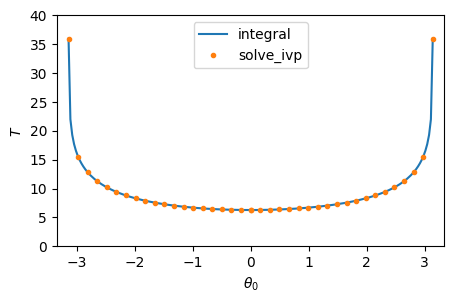

In [61]:
# plot them together
plt.figure(figsize=(5,3))
plt.plot(theta_0_list_int, period_list_int, label='integral')
plt.plot(theta_0_list_ode, period_list_ode, '.', label='solve_ivp')
plt.xlabel('$\\theta_0$')
plt.ylabel('$T$')
plt.xlim(-np.pi-0.2, np.pi+0.2)
plt.ylim(0, 40)
plt.legend()
plt.show()

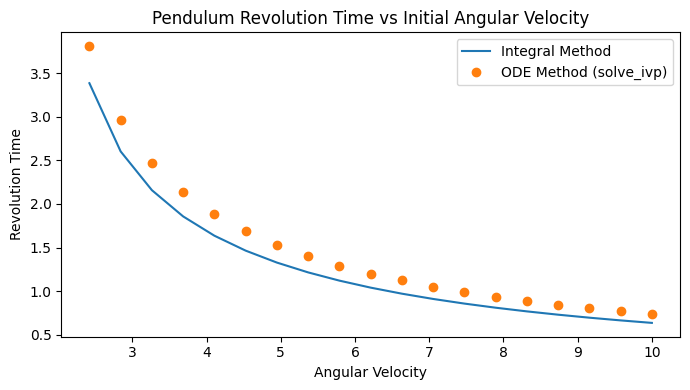

In [66]:
plt.figure(figsize=(7, 4))
plt.plot(ang_vel_list_int, rev_integral, label='Integral Method')
plt.plot(ang_vel_list_ode, rev_ode, 'o', label='ODE Method (solve_ivp)')
plt.xlabel('Angular Velocity')
plt.ylabel('Revolution Time')
plt.title('Pendulum Revolution Time vs Initial Angular Velocity')
plt.legend()
plt.tight_layout()
plt.show()